In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df =pd.read_csv(r"C:\Users\hp\Downloads\usa_rain_prediction_dataset_2024_2025.csv")
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [9]:
#Types of columns
df.dtypes

Date              object
Location          object
Temperature      float64
Humidity         float64
Wind Speed       float64
Precipitation    float64
Cloud Cover      float64
Pressure         float64
Rain Tomorrow      int64
dtype: object

In [11]:
#Shape of the data set
df.shape

(73100, 9)

# Checking null value

In [16]:
df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

# For replacing numerical columns

# Taking mean of the column which has null value and replace with mean

In [20]:
df_mean=df['Temperature'].mean()
df['Temperature']=df['Temperature'].fillna(df_mean)

df_mean=df['Humidity'].mean()
df['Humidity']=df['Humidity'].fillna(df_mean)

df_mean=df['Wind Speed'].mean()
df['Wind Speed']=df['Wind Speed'].fillna(df_mean)

df_mean=df['Precipitation'].mean()
df['Precipitation']=df['Precipitation'].fillna(df_mean)

df_mean=df['Cloud Cover'].mean()
df['Cloud Cover']=df['Cloud Cover'].fillna(df_mean)

df_mean=df['Pressure'].mean()
df['Pressure']=df['Pressure'].fillna(df_mean)

df_mean=df['Rain Tomorrow'].mean()
df['Rain Tomorrow']=df['Rain Tomorrow'].fillna(df_mean)


In [22]:
df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

# Taking mode of the column which has null value and replace with mode

In [25]:
mode_value= df["Wind Speed"].mode()[0]
df["Wind Speed"].fillna(mode_value, inplace= True)

mode_value= df["Precipitation"].mode()[0]
df["Precipitation"].fillna(mode_value, inplace= True)

mode_value= df["Rain Tomorrow"].mode()[0]
df["Rain Tomorrow"].fillna(mode_value, inplace= True)


# Feature Engineering

for visualization we split the "date" column into 3 new columns which is "day", "month" and "year" without droping an original column

In [30]:
df["Date"]=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

# Visualization

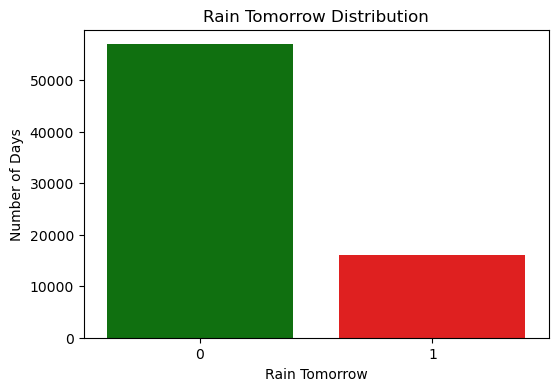

In [45]:
# 1. Rainfall Probability
plt.figure(figsize=(6, 4))
sns.countplot(x='Rain Tomorrow', data=df, palette=['green', 'Red'])
plt.title("Rain Tomorrow Distribution")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Number of Days")
plt.show()

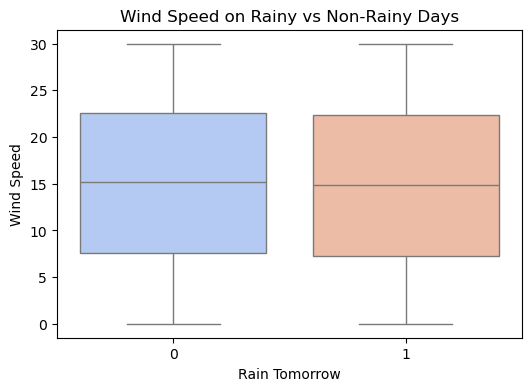

In [49]:
# 2. Wind Speed & Rain (Box Plot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Rain Tomorrow', y='Wind Speed', data=df, palette='coolwarm')
plt.title("Wind Speed on Rainy vs Non-Rainy Days")
plt.show()

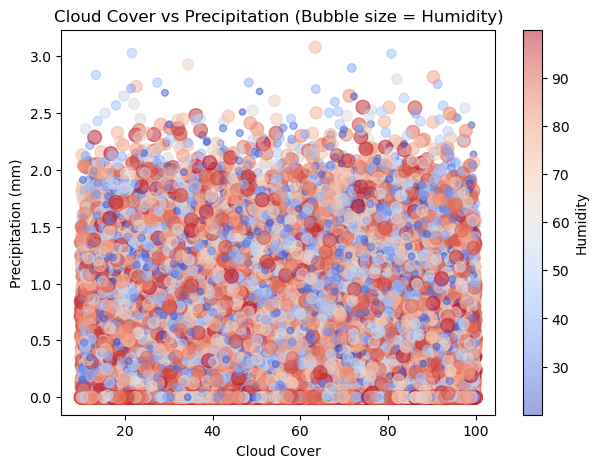

In [51]:
# 3. Cloud Cover & Precipitation (Bubble Chart)
plt.figure(figsize=(7, 5))
plt.scatter(df['Cloud Cover'], df['Precipitation'], s=df['Humidity'], alpha=0.5, c=df['Humidity'], cmap='coolwarm')
plt.colorbar(label='Humidity')
plt.xlabel("Cloud Cover")
plt.ylabel("Precipitation (mm)")
plt.title("Cloud Cover vs Precipitation (Bubble size = Humidity)")
plt.show()

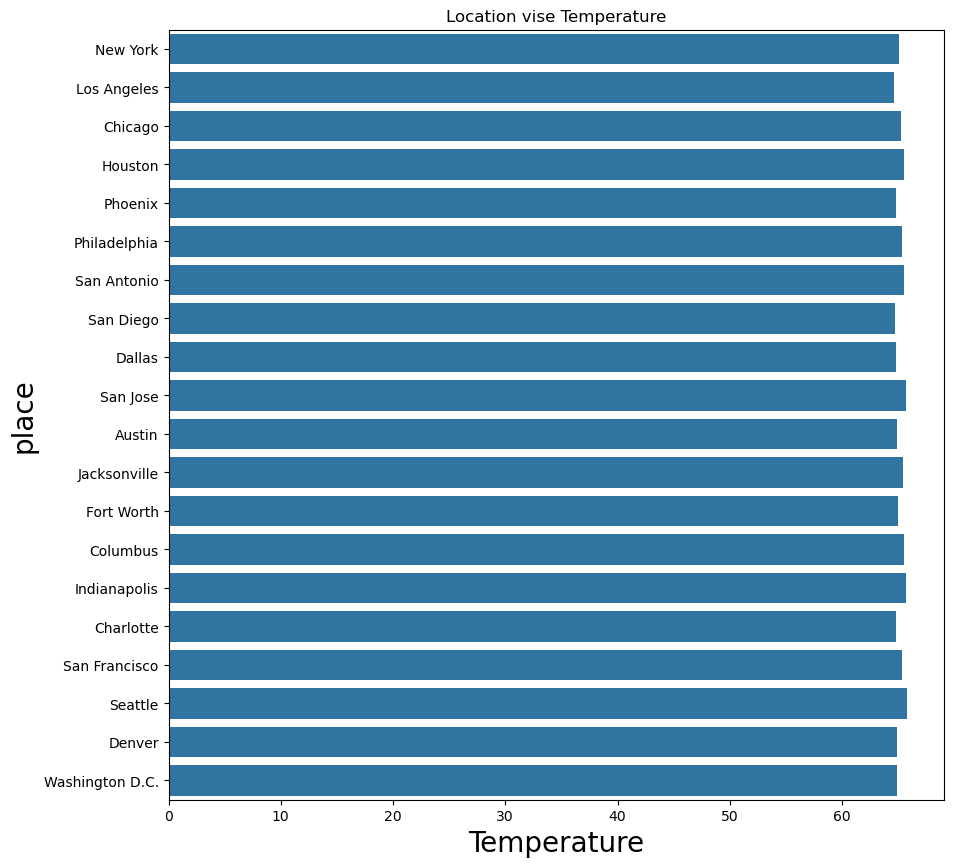

In [55]:
# 4. Location wise Temperature (Bar plot)
plt.figure(figsize=(10,10))
sns.barplot(x = df["Temperature"], y = df["Location"],ci=False)
plt.title('Location vise Temperature')
plt.xlabel('Temperature',fontsize=20)
plt.ylabel('place',fontsize=20)
plt.show()

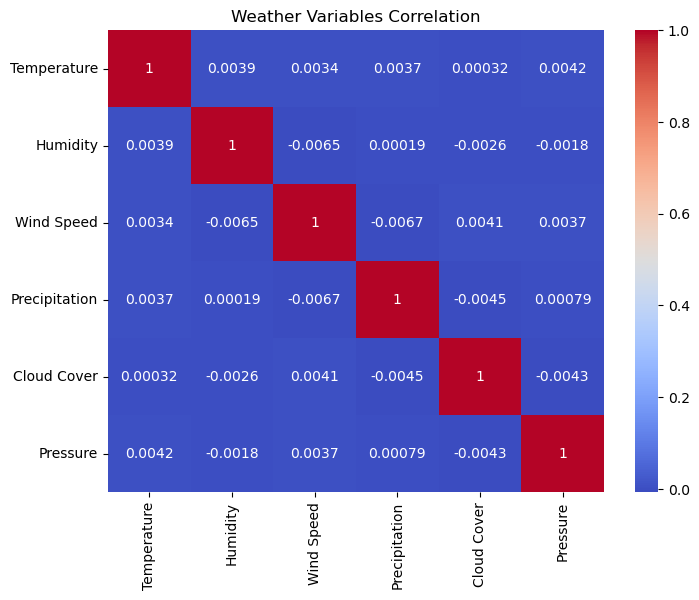

In [63]:
# 5. Correlation Heatmap (Weather Variables)
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature','Humidity','Wind Speed','Precipitation','Cloud Cover','Pressure']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Weather Variables Correlation")
plt.show()


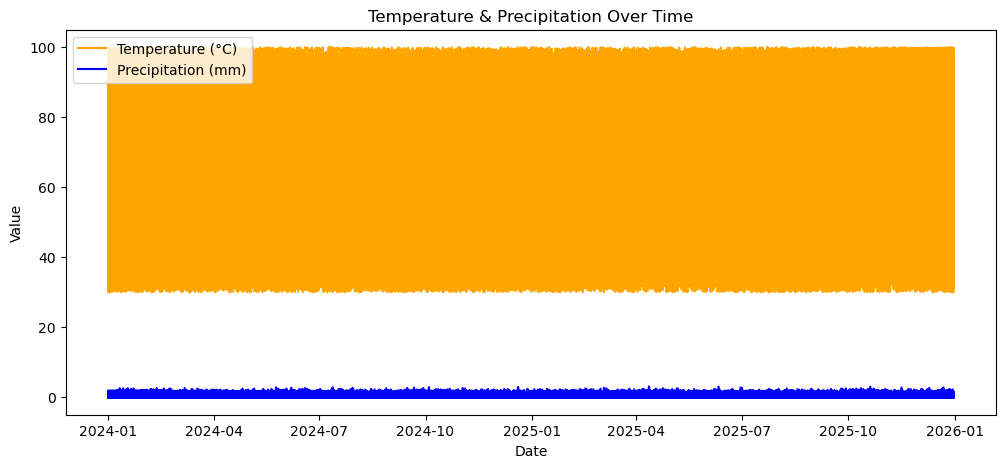

In [69]:
# 6. Temperature & Precipitation Trend Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Temperature'], label='Temperature (°C)', color='orange')
plt.plot(df['Date'], df['Precipitation'], label='Precipitation (mm)', color='blue')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Temperature & Precipitation Over Time")
plt.legend()
plt.show()

# After visuallazation is done, droping the "day", "month", "year" column because we dont need them for ml

In [76]:
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)

In [78]:
#checking size (col,lin) of dataset
print("Number of rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of rows: 73100
Number of Columns: 9


In [80]:
df['Date'] = df['Date'].astype(str)

In [82]:
#checking how many different values there are per column
df.nunique()

Date               731
Location            20
Temperature      73100
Humidity         73100
Wind Speed       73100
Precipitation    44754
Cloud Cover      73100
Pressure         73100
Rain Tomorrow        2
dtype: int64

# Separting Numeric and category Data

In [85]:
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [87]:
df_num=df.select_dtypes(['int','float'])
df_num

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...
73095,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [89]:
df_object=df.select_dtypes(['object'])
df_object

,Date,Location
0,2024-01-01,New York
1,2024-01-02,New York
2,2024-01-03,New York
3,2024-01-04,New York
4,2024-01-05,New York
...,...,...
73095,2025-12-27,Washington D.C.
73096,2025-12-28,Washington D.C.
73097,2025-12-29,Washington D.C.
73098,2025-12-30,Washington D.C.


# Using Label Encoder for converting category data into numeric

In [92]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [94]:
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i]) 
#convert the cat to label encoder
df_object

,Date,Location
0,0,11
1,1,11
2,2,11
3,3,11
4,4,11
...,...,...
73095,726,19
73096,727,19
73097,728,19
73098,729,19


# Feature scaling

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [99]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[ 1.10575603,  0.68414303,  1.54136228, ...,  0.5648135 ,
         1.03219773, -0.53172003],
       [ 0.89465323, -1.35101371, -0.29779812, ..., -0.51330151,
        -0.45605135, -0.53172003],
       [ 0.78001824,  0.21091698, -0.0961065 , ...,  0.86297009,
        -1.20667074,  1.88068899],
       ...,
       [-0.43006176,  1.59825109, -1.39850583, ..., -0.10032822,
         0.55896357,  1.88068899],
       [ 0.02804588,  0.17449796,  1.10910378, ...,  0.8406671 ,
         1.34728117,  1.88068899],
       [-0.52132242,  0.90770047,  0.88878217, ..., -1.35737923,
        -1.50172508, -0.53172003]])

In [101]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)

       Temperature  Humidity  Wind Speed  Precipitation  Cloud Cover  \
0         1.105756  0.684143    1.541362      -0.822685     0.564813   
1         0.894653 -1.351014   -0.297798       0.287176    -0.513302   
2         0.780018  0.210917   -0.096107       1.108290     0.862970   
3         0.639191 -0.005899    0.510584      -0.624437    -0.092433   
4        -1.391804 -1.088542   -1.306808       2.044179     1.179310   
...            ...       ...         ...            ...          ...   
73095    -1.215891  0.226498    1.587369      -0.822685    -0.029801   
73096    -0.620649 -1.268732   -0.315511       1.011657    -1.265274   
73097    -0.430062  1.598251   -1.398506       1.687596    -0.100328   
73098     0.028046  0.174498    1.109104       0.195407     0.840667   
73099    -0.521322  0.907700    0.888782      -0.502774    -1.357379   

       Pressure  Rain Tomorrow  
0      1.032198      -0.531720  
1     -0.456051      -0.531720  
2     -1.206671       1.880689  
3  

# Concatenate Numerical and Categorical Columns

In [104]:
df_new=pd.concat([df_scaled,df_object],axis=1)
df_new

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Date,Location
0,1.105756,0.684143,1.541362,-0.822685,0.564813,1.032198,-0.531720,0,11
1,0.894653,-1.351014,-0.297798,0.287176,-0.513302,-0.456051,-0.531720,1,11
2,0.780018,0.210917,-0.096107,1.108290,0.862970,-1.206671,1.880689,2,11
3,0.639191,-0.005899,0.510584,-0.624437,-0.092433,-1.295000,-0.531720,3,11
4,-1.391804,-1.088542,-1.306808,2.044179,1.179310,1.317322,-0.531720,4,11
...,...,...,...,...,...,...,...,...,...
73095,-1.215891,0.226498,1.587369,-0.822685,-0.029801,-1.390448,-0.531720,726,19
73096,-0.620649,-1.268732,-0.315511,1.011657,-1.265274,-1.216821,-0.531720,727,19
73097,-0.430062,1.598251,-1.398506,1.687596,-0.100328,0.558964,1.880689,728,19
73098,0.028046,0.174498,1.109104,0.195407,0.840667,1.347281,1.880689,729,19


# split the data

In [120]:
y=df_new.iloc[:,15:16]
y

""
0
1
2
3
4
...
73095
73096
73097
73098


In [128]:
# Remove the column with the exact name from X
X = df_new.drop('Rain Tomorrow', axis=1)  # note the space in the column name
y = df_new['Rain Tomorrow']               # target variable

print(X.head())
print(y.head())
print(df_new.columns.tolist())

   Temperature  Humidity  Wind Speed  Precipitation  Cloud Cover  Pressure  \
0     1.105756  0.684143    1.541362      -0.822685     0.564813  1.032198   
1     0.894653 -1.351014   -0.297798       0.287176    -0.513302 -0.456051   
2     0.780018  0.210917   -0.096107       1.108290     0.862970 -1.206671   
3     0.639191 -0.005899    0.510584      -0.624437    -0.092433 -1.295000   
4    -1.391804 -1.088542   -1.306808       2.044179     1.179310  1.317322   

   Date  Location  
0     0        11  
1     1        11  
2     2        11  
3     3        11  
4     4        11  
0   -0.531720
1   -0.531720
2    1.880689
3   -0.531720
4   -0.531720
Name: Rain Tomorrow, dtype: float64
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow', 'Date', 'Location']


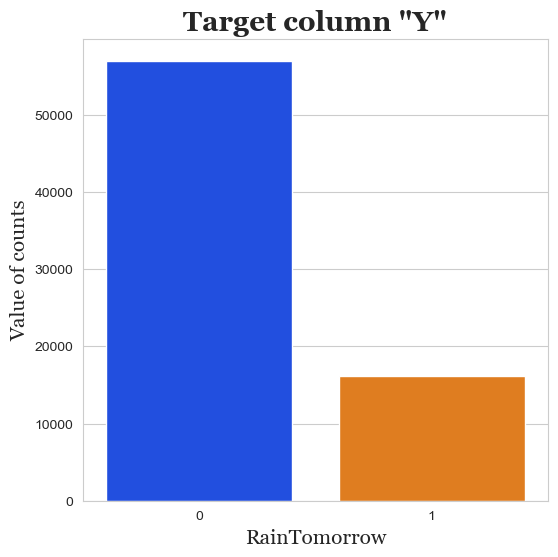

In [134]:
RainTomorrow = df['Rain Tomorrow'].value_counts()

# Set Seaborn style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=RainTomorrow.index, y=RainTomorrow.values, palette='bright')
plt.title('Target column "Y"', fontdict={
          'fontname': 'Georgia', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('RainTomorrow', fontdict={'fontname': 'Georgia', 'fontsize': 15})
plt.ylabel('Value of counts', fontdict={
           'fontname': 'Georgia', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

In [136]:
y.value_counts()

Rain Tomorrow
-0.531720    56988
 1.880689    16112
Name: count, dtype: int64

# Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [155]:
from imblearn.over_sampling import RandomOverSampler

# If you already scaled everything, reload or use a copy from before scaling
df_original = pd.read_csv(r"C:\Users\hp\Downloads\usa_rain_prediction_dataset_2024_2025.csv")  # replace with your original file

X = df_original.drop('Rain Tomorrow', axis=1)
y = df_original['Rain Tomorrow']  # should be 0/1 or Yes/No

# Oversample
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Assign to lowercase variables if you want
x = X_ros
y = y_ros

print("Before oversampling:\n", y.value_counts())
print("After oversampling:", y_ros.value_counts())


Before oversampling:
 Rain Tomorrow
0    56988
1    56988
Name: count, dtype: int64
After oversampling: Rain Tomorrow
0    56988
1    56988
Name: count, dtype: int64


In [157]:
y.value_counts()  

Rain Tomorrow
0    56988
1    56988
Name: count, dtype: int64

# Importing the models and Train them

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [168]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbrt = GradientBoostingClassifier()
xgboost = XGBClassifier()

In [170]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# Logistic Regression

In [238]:
y = df_new['Rain Tomorrow'].astype(int)
X = df_new.drop('Rain Tomorrow', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

logreg = LogisticRegression(max_iter=1000)
mymodel(logreg)



              precision    recall  f1-score   support

           0       0.92      0.97      0.94     17062
           1       0.85      0.70      0.77      4868

    accuracy                           0.91     21930
   macro avg       0.88      0.83      0.85     21930
weighted avg       0.90      0.91      0.90     21930

Accuracy: 0.9059279525763794


In [240]:
LogisticRegression()

LogisticRegression()

In [242]:
# accuracy score on the train data
y_pred = logreg.predict(x_train)
Train_Accuracy_logreg = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_logreg*100,2),"%")

Accuracy score of the training data :  90.44 %


In [244]:
# accuracy score on the test data
y_pred_on_test_data = logreg.predict(x_test)
Test_Accuracy_logreg = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_logreg*100,2),"%")

Accuracy score of the test data :  90.59 %


# KNeighborsClassifier

In [247]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17062
           1       0.77      0.46      0.57      4868

    accuracy                           0.85     21930
   macro avg       0.82      0.71      0.74     21930
weighted avg       0.84      0.85      0.83     21930

Accuracy: 0.849703602371181


In [251]:
KNeighborsClassifier()

KNeighborsClassifier()

In [253]:
# accuracy score on the train data
y_pred = knn.predict(x_train)
Train_Accuracy_knn = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_knn*100,2),"%")

Accuracy score of the training data :  90.38 %


In [255]:
# accuracy score on the test data
y_pred_on_test_data = knn.predict(x_test)
Test_Accuracy = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy*100,2),"%")

Accuracy score of the test data :  84.97 %


# Decision Tree

In [258]:
mymodel(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       1.00      1.00      1.00      4868

    accuracy                           1.00     21930
   macro avg       1.00      1.00      1.00     21930
weighted avg       1.00      1.00      1.00     21930

Accuracy: 1.0


In [260]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [262]:
# accuracy score on the train data
y_pred = dt.predict(x_train)
Train_Accuracy_dt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_dt*100,2),"%")

Accuracy score of the training data :  100.0 %


In [264]:
# accuracy score on the test data
y_pred_on_test_data = dt.predict(x_test)
Test_Accuracy_dt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_dt*100,2),"%")

Accuracy score of the test data :  100.0 %


# Random forest

In [267]:
mymodel(rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       1.00      1.00      1.00      4868

    accuracy                           1.00     21930
   macro avg       1.00      1.00      1.00     21930
weighted avg       1.00      1.00      1.00     21930

Accuracy: 1.0


In [269]:
RandomForestClassifier()

RandomForestClassifier()

In [271]:
# accuracy score on the train data
y_pred = rf.predict(x_train)
Train_Accuracy_rf = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_rf*100,2),"%")

Accuracy score of the training data :  100.0 %


In [273]:
# accuracy score on the test data
y_pred_on_test_data = rf.predict(x_test)
Test_Accuracy_rf = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_rf*100,2),"%")

Accuracy score of the test data :  100.0 %


# XG Boosting Classifier

In [276]:
mymodel(xgboost)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       1.00      1.00      1.00      4868

    accuracy                           1.00     21930
   macro avg       1.00      1.00      1.00     21930
weighted avg       1.00      1.00      1.00     21930

Accuracy: 0.9992704058367533


In [282]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [284]:
# accuracy score on the train data
y_pred = xgboost.predict(x_train)
Train_Accuracy_xgboost = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_xgboost*100,2),"%")

Accuracy score of the training data :  100.0 %


In [286]:
# accuracy score on the test data
y_pred_on_test_data = xgboost.predict(x_test)
Test_Accuracy_xgboost = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_xgboost*100,2),"%")

Accuracy score of the test data :  99.93 %


# Gradient Boosting Classifier

In [289]:
mymodel(gbrt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17062
           1       1.00      1.00      1.00      4868

    accuracy                           1.00     21930
   macro avg       1.00      1.00      1.00     21930
weighted avg       1.00      1.00      1.00     21930

Accuracy: 1.0


In [291]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [293]:
# accuracy score on the train data
y_pred = gbrt.predict(x_train)
Train_Accuracy_gbrt = accuracy_score(y_pred, y_train)
print('Accuracy score of the training data : ', round(Train_Accuracy_gbrt*100,2),"%")

Accuracy score of the training data :  100.0 %


In [295]:
# accuracy score on the test data
y_pred_on_test_data = gbrt.predict(x_test)
Test_Accuracy_gbrt = accuracy_score(y_pred_on_test_data, y_test)
print('Accuracy score of the test data : ', round(Test_Accuracy_gbrt*100,2),"%")

Accuracy score of the test data :  100.0 %


# GridSearchCV LogisticRegression

In [298]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty type
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Create a logistic regression classifier object
logistic_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Perform grid search using cross-validation
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test set accuracy of the best model:", test_accuracy)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Test set accuracy of the best model: 0.9054719562243502


# GridSearchCV KNeighborsClassifier

In [301]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Test set accuracy of the best model:", test_accuracy)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Test set accuracy of the best model: 0.8644322845417237


In [303]:
ML_Model=['Linear Regression','Decision Tree','Random Forest','XG Boosting Classifier','Gradient Boosting Classifier', 'k-Nearest Neighbors Regression']

Train_Accuracy=[Train_Accuracy_logreg,Train_Accuracy_dt,Train_Accuracy_rf,Train_Accuracy_xgboost,Train_Accuracy_gbrt,Train_Accuracy_knn]
Train_ACC = [round(i,3) for i in Train_Accuracy]

Test_Accuracy=[Test_Accuracy_logreg,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_xgboost,Test_Accuracy_gbrt,Test_Accuracy_logreg]
Test_ACC = [round(i,3) for i in Test_Accuracy]

In [305]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': Train_ACC,
    'Test Accuracy': Test_ACC},index=[1,2,3,4,5,6])

In [307]:
results

,ML Model,Train Accuracy,Test Accuracy
1,Linear Regression,0.904,0.906
2,Decision Tree,1.000,1.000
3,Random Forest,1.000,1.000
4,XG Boosting Classifier,1.000,0.999
5,Gradient Boosting Classifier,1.000,1.000
6,k-Nearest Neighbors Regression,0.904,0.906


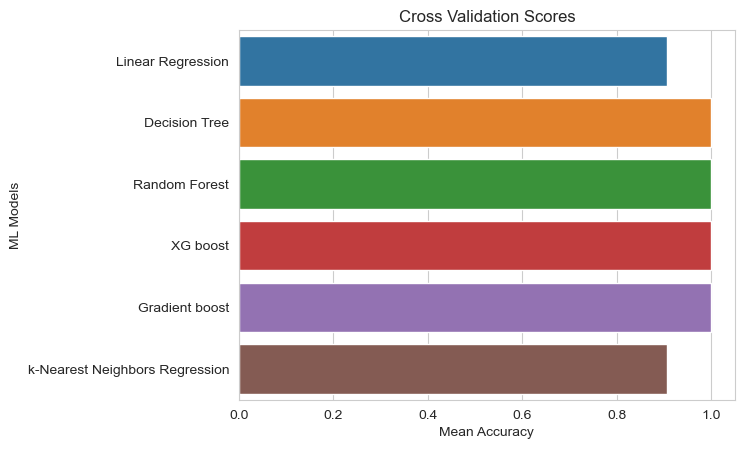

In [313]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [
        Test_Accuracy_logreg,
        Test_Accuracy_dt,
        Test_Accuracy_rf,
        Test_Accuracy_xgboost,
        Test_Accuracy_gbrt,
        Test_Accuracy_logreg
    ],
    "ML Models": [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'XG boost',
        'Gradient boost',
        'k-Nearest Neighbors Regression'
    ]
})

# Define a custom color palette for each model
palette = {
    'Linear Regression': '#1f77b4',  # Blue
    'Decision Tree': '#ff7f0e',       # Orange
    'Random Forest': '#2ca02c',       # Green
    'XG boost': '#d62728',            # Red
    'Gradient boost': '#9467bd',      # Purple
    'k-Nearest Neighbors Regression': '#8c564b'  # Brown
}

# Plot with different colors per model
g = sns.barplot(
    x="Cross Validation Means",
    y="ML Models",
    data=cv_results,
    palette=palette
)

# Labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

plt.show()

# CONCLUSION

In [ ]:
In this project, we build various models like Linear regression,decision tree classifier,random forest, XG Boost, Gradient Boost,knn classifier.

Random Forest, Decision Tree, XG Boost, Gradient Boost gives the highest accuracy score of percent among all the ML Models.

So for the Rainfall prediction Random Forest Classifier is best model.